<a href="https://colab.research.google.com/github/JeffAirData/Energy-Load-Portugal-Temporal-Series/blob/main/Energy_Load_'Portugal'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Energy Load 'Portugal'**
**TEMPORAL SERIES:**

###*Jefferson Oliveira Melo*

**Introduction:**

In [ ]:
# A temporal series is a set of data points collected over time. To describe a temporal series, several characteristics can be
  # considered, including:

# Trend: A trend refers to the overall direction of the data points over time. The trend can be upward, downward, or flat.
# Seasonality: Seasonality refers to the presence of regular patterns in the data that repeat over a specific time period, such as daily,
  # weekly, or yearly.
# Cyclical: Cyclical patterns refer to patterns that occur over a longer period than seasonality, but are not as regular.
# Irregularity: Irregularity refers to random fluctuations in the data that do not have a clear pattern.
# Autocorrelation: Autocorrelation is the correlation between a time series and a lagged version of itself.
  # It can indicate if there is a pattern that repeats itself at regular intervals.
# Stationarity: Stationarity is a property of a time series in which the mean, variance, and autocovariance do not change over time.
# Volatility: Volatility is a measure of how much the values of the time series change over time.
  # A volatile time series will have large fluctuations, while a less volatile series will have smaller fluctuations.
# Distribution: Distribution is the statistical properties of the data, such as mean, variance, skewness and kurtosis.
# These characteristics can be used to describe the temporal series, and can help understand the underlying patterns and trends
  # in the data, which can aid in forecasting future values or modeling the time series.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Library:**

In [ ]:
import numpy as np
import pandas as pd
import requests

from datetime import datetime
from io import BytesIO

from matplotlib import pyplot as plt
from scipy.stats import shapiro
from patsy import dmatrices

import statsmodels.stats.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs
from pmdarima.arima import auto_arima

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


**Data Dimention:**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vcerqueira/energy_load_data/main/energy_load_pt.csv')
data.shape

(13104, 2)

In [ ]:
data.head()

,datetime,load
0,2020-11-17 08:00:00,5159.0
1,2020-11-17 09:00:00,4985.0
2,2020-11-17 10:00:00,4717.0
3,2020-11-17 11:00:00,4356.0
4,2020-11-17 12:00:00,4086.0


**Graphics of the T.S.:**

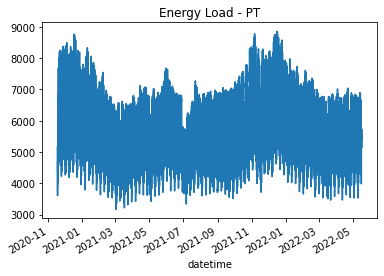

In [ ]:
series = pd.Series(data['load'])
series.index = pd.to_datetime(data['datetime'])
series.plot()
plt.title("Energy Load - PT")
plt.show()

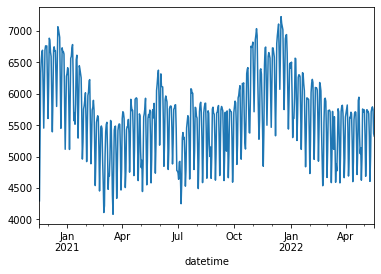

In [ ]:
series1 = series.resample('D').mean()
series1.plot()

**Seasonal Decompose:**

In [ ]:
# Seasonal decomposition is a technique used to separate a time series into its underlying components, including the trend, seasonal,
  # and residual components.
# The trend component captures the long-term changes in the data, such as an overall increase or decrease.
# The seasonal component captures the repeating patterns in the data, such as daily, weekly, or yearly patterns.
# The residual component captures the remaining irregular fluctuations in the data that are not explained by the trend or seasonal
  # components.

# There are different methods to perform a seasonal decomposition, such as:
  # Classical decomposition method, which uses moving averages to estimate the trend and seasonal components;
  # X-11 decomposition, which is an extension of the classical method and uses more advanced techniques to handle irregular and missing data;
  # STL decomposition, which is based on the decomposition of a time series into seasonal, trend and remainder components using Loess smoothing;
  # Trend-Cycle decomposition which is similar to STL decomposition, but it uses different smoothing methods.
# The choice of method will depend on the specific characteristics of the time series and the desired level of accuracy.
  # After the decomposition, the resulting components can be further analyzed and used for various purposes such as forecasting or
  # identifying patterns in the data.

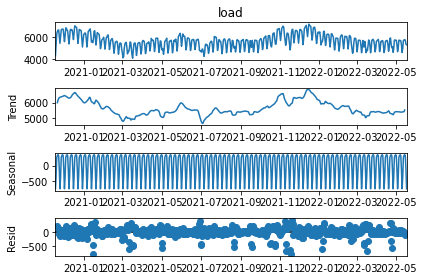

In [ ]:
result = seasonal_decompose(series1, model='aditive')
result.plot()
plt.show()

**About Stationarity:**

In [ ]:
# A stationary time series is a time series in which the mean, variance, and autocovariance do not change over time.
  # This means that the statistical properties of the series are constant over time, and there are no trends or seasonality present.
  # Stationarity is an important assumption for many time series models, such as the popular ARIMA model.

# The "ndiffs" function is a helper function often used in time series analysis typically used in conjunction with the augmented
  # Dickey-Fuller (ADF) test, which is a statistical test for checking whether a time series is stationary. The test calculates the
  # number of differences needed to make the time series stationary. The resulting number of differences, or "ndiffs," is then used
  # to adjust the original time series by taking the difference between consecutive values the specified number of times.

# For example, if the ndiffs value is 1, the time series would be differenced once, resulting in a new series that measures the change
  # in values over time. If the ndiffs value is 2, the time series would be differenced twice, resulting in a new series that measures
  # the change in the change in values over time.

# In practice, you can use the ndiffs parameter to determine the order of differencing in an ARIMA model, which is a method for
  # forecasting time series data. By finding the number of differences required to make the time series stationary, the model can
  # adjust the data accordingly and provide more accurate forecasts.

In [ ]:
ndiffs(series1, test='adf')

1

In [ ]:
# Applying a difference:

In [ ]:
series1 = series1.diff(periods=1)
series1.dropna(inplace=True)

In [ ]:
ndiffs(series1, test='adf')

0

In [ ]:
# Verifying the seasonal order:

nsdiffs(series1, test='ocsb', m=7)

0

**Identifying the autoregressive order:**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

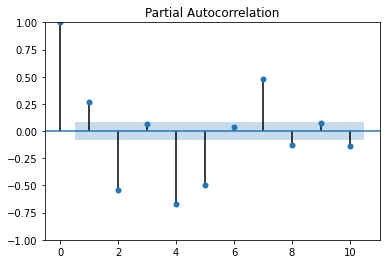

In [ ]:
# Plotting the PACF function
plt.figure()
plot_pacf(series1, lags=10)
plt.show()

In [ ]:
# The order of the autoregressive term (p) is given by the number of significant peaks in the PACF plot before the function decays to values ​​close to zero.
  # Observing the corresponding graph, we verify that the order of the autoregressive term is 2, therefore AR(2)

**Identifying the the moving averages order:**

<Figure size 432x288 with 0 Axes>

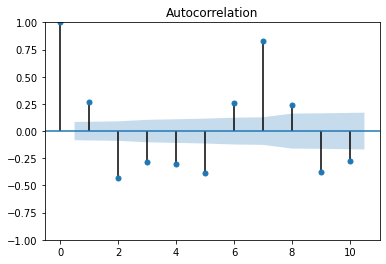

In [ ]:
# Defining the temporal series:

# Plotting the ACF function
plt.figure()
plot_acf(series1, lags=10)
plt.show()

In [ ]:
# The order of the moving average (q) is given by the number of significant peaks in the ACF graph before the function
  # decays to values ​​close to zero. Looking at the corresponding chart, we see that the order of the term moving averages is 2,
  # so we have an MA(2)
# Therefore, in this way we can conclude that the Arima model apparently more adequate to fit the data is ARIMA(2,1,2).
# However, before making the adjustment, we will check the behavior of the series, that is, if it follows a "normal distribution" or not.
# We will also verify if the series is homoscedastic (variance of constant errors) and finally if it is a stationary series.

**The Shapiro-Wilk Test:**

In [ ]:
# The Shapiro-Wilk test: is a statistical test used to determine whether a sample of data comes from a normal distribution.
# The test compares the sample's skewness and kurtosis (measure of the shape of the distribution) with that of the normal distribution.
# A smaller p-value (typically less than 0.05) indicates that the sample is unlikely to have come from a normal distribution.

stat, p = shapiro(series1)
print("Valor-p: ", p)

Valor-p:  7.39867455495924e-12


In [ ]:
# Therefore, there is statistical evidence that the data follow a "Gaussian behavior" or in the similar a "normal distribution".
# In this way, we do not need to resort to a Box-Cox transformation¹.

        # ¹A Box-Cox transformation is a method for transforming non-normal data into a normal or nearly normal distribution.
          # The Box-Cox transformation is a family of power transforms that can be used to stabilize the variance of a time series
          # and make it more stationary.

**White Test: Heteroscedasticity.**

In [ ]:
# The White test, also known as the White heteroscedasticity test, is a statistical test used to determine whether there is
  # heteroscedasticity (non-constant variance) in a linear regression model. Heteroscedasticity occurs when the variance of the
  # error term is not constant across all levels of the independent variable(s).

# The White test is based on the residuals of the linear regression model and is conducted by regressing the squared residuals
  # on the independent variable(s) and testing whether the coefficients are statistically different from zero. If the coefficients
  # are not statistically different from zero, then there is evidence of heteroscedasticity.

In [ ]:
def het_tests(series: pd.Series, test: str) -> float:
    """
    Testing for heteroskedasticity using the White or Breusch-Pagan test
    :param series: Univariate time series as pd.Series
    :param test: String denoting the test. One of 'white' or 'breuschpagan'
    :return: p-value as a float.
    If the p-value is high, we accept the null hypothesis that there is no heteroscedastisticity
    """
    formula = 'value ~ time'
    assert test in ['white', 'breuschpagan'], 'Unknown test'

    series = series.reset_index(drop=True).reset_index()
    series.columns = ['time', 'value']
    series['time'] += 1

    olsr = ols(formula, series).fit()

    y, X = dmatrices(formula, series, return_type='dataframe')

    if test == 'white':
        _, p_value, _, _ = sms.het_white(olsr.resid, X)
    else:
        _, p_value, _, _ = sms.het_breuschpagan(olsr.resid, X)

    return p_value
p_value = het_tests(series1, test='white')
print(p_value)

0.47402176350753256


In [ ]:
# Therefore, as p-value > 0.05, then we do not reject the null hypothesis, so we can say that there is statistical
  # evidence that the variance of errors is constant, that is, homoscedastic.

**The Dickey-Fuller test: Stationarity.**

In [ ]:
# The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary, meaning it has a constant mean,
  # variance, and autocorrelation. The test involves regressing the time series on its own lagged values and testing the null hypothesis
  # that the coefficient on the lagged values is equal to one. If the null hypothesis is rejected, then the time series is considered
  # to be stationary. If it fails to reject the null hypothesis, then the time series is not stationary.

In [ ]:
result = adfuller(series1)
print(result[1])
# p-value

3.2287865942887613e-11


In [ ]:
# As the p-value < 0.05 , then we can reject the null hypothesis, and therefore conclude that there is statistical evidence
  # that the present series is stationary. Thus, we are ready to use prediction models.

<Figure size 2160x1440 with 0 Axes>

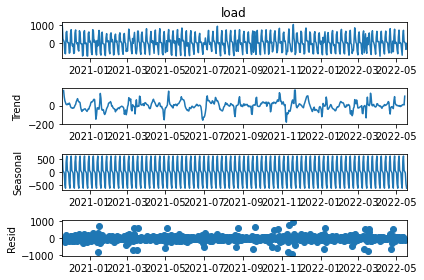

In [ ]:
result = seasonal_decompose(series1, model='aditive')
plt.figure(figsize=(30,20))
result.plot()
plt.show()

##**The ARIMA Modelation:**

**ARIMA (2,1,2)**


In [ ]:
model = ARIMA(series1, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary()) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  546
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3955.350
Date:                Sun, 22 Jan 2023   AIC                           7920.700
Time:                        23:38:03   BIC                           7942.204
Sample:                    11-18-2020   HQIC                          7929.107
                         - 05-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0950      0.058     -1.636      0.102      -0.209       0.019
ar.L2         -0.3417      0.051     -6.717      0.000      -0.441      -0.242
ma.L1         -0.2055      0.081     -2.524      0.0

In [ ]:
# Looking at the summary we see that most of the coefficients are statistically significant.
# However, as can be seen, the first coefficient, ar.l1, is not. So let's take an order out of the autorregressive model.

**ARIMA (1,1,2)**

In [ ]:
model = ARIMA(series1, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary()) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  546
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3981.087
Date:                Sun, 22 Jan 2023   AIC                           7970.173
Time:                        23:38:03   BIC                           7987.376
Sample:                    11-18-2020   HQIC                          7976.899
                         - 05-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1433      0.070     -2.050      0.040      -0.280      -0.006
ma.L1         -0.1079      4.641     -0.023      0.981      -9.204       8.988
ma.L2         -0.8921      4.131     -0.216      0.8

In [ ]:
# Looking again at the summary we see that most of the coefficients are now not statistically significant,
  # however the autoregressive coefficient is significant. So let's withdraw an order on the moving averages.

**ARIMA (1,1,1)**

In [ ]:
model = ARIMA(series1, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  546
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4144.601
Date:                Sun, 22 Jan 2023   AIC                           8295.202
Time:                        23:38:03   BIC                           8308.105
Sample:                    11-18-2020   HQIC                          8300.246
                         - 05-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4717      0.066     -7.108      0.000      -0.602      -0.342
ma.L1          0.9010      0.028     31.946      0.000       0.846       0.956
sigma2      2.358e+05   1.32e+04     17.880      0.0

In [ ]:
# As we can see, now all coefficients are statistically significant, so we choose the ARIMA(1,1,1) model.

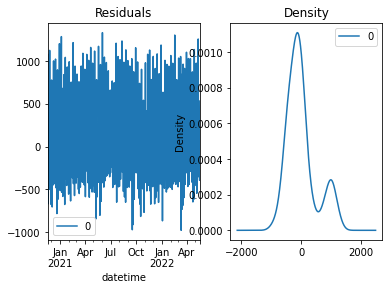

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
# As we can see, the residuals seem in line with what was intended, since the average appears to be constant, as well as
  # the constant variance. We were also able to visualize the plot of the density function, which presents a Gaussian behavior as intended.

##**Cross Validation:**

In [ ]:
# Converting the series in a DataFrame:
series1 = series1.to_frame().reset_index()
series1 = series1.rename(columns={'index':'datetime'})

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data.head()
data

,datetime,load
0,2020-11-17 08:00:00,5159.0
1,2020-11-17 09:00:00,4985.0
2,2020-11-17 10:00:00,4717.0
3,2020-11-17 11:00:00,4356.0
4,2020-11-17 12:00:00,4086.0
...,...,...
13099,2022-05-17 04:00:00,5190.0
13100,2022-05-17 05:00:00,5297.0
13101,2022-05-17 06:00:00,5441.0
13102,2022-05-17 07:00:00,5735.0


In [ ]:
# The function below implements a time delay embedding technique for multivariate time series data.
# The function takes in a DataFrame (data) containing the time series data, an integer (k) representing the embedding dimension
  # (applied to all columns), an integer (horizon) representing the forecasting horizon, and a string (target_col) representing
  # the target column.

# The function first creates a list (iter_over_k) that contains the integers from k to 0 (inclusive) in descending order.
# Next, it creates an empty list (X_cols) to store the input sequences for each column. The function then iterates over each column
  # in the DataFrame, creates an empty list (X) for the input sequence, and for each integer in iter_over_k, it appends the
  # shifted values ​​of the current column to the list X. The function then concatenates the input sequences for all columns, and assigns
  # the column names as 'col-j-1' where j is the current element of iter_over_k.

# The function then creates another list (y) for the forecast sequence, which is simply the shifted target column values.
# The function concatenates the input and forecast sequences, and assigns the column names as 'target_col+i' where i is the current
  # element of range(1, horizon + 1).

# The function then concatenates the input sequences, forecast sequences and assigns the column names as 'col-j-1' where j is
  # the current element of iter_over_k and 'target_col+i' where i is the current element of range(1, horizon + 1).

# Finally, if drop_na is set to True, the function removes any rows with missing values, and returns the resulting DataFrame.

In [ ]:
def MultivariateTDE(data: pd.DataFrame,
                    k: int,
                    horizon: int,
                    target_col: str, drop_na: bool = True):
    """
    time delay embedding for mv time series
    :param data: multivariate time series as pd.DF
    :param k: embedding dimension (applied to all cols)
    :param horizon: forecasting horizon
    :param target_col: string denoting the target column
    :return: trainable data set
    """

    iter_over_k = list(range(k, 0, -1))

    X_cols = []
    for col in data.columns:
        # input sequence (t-n, ... t-1)
        X, col_iter = [], []
        for i in iter_over_k:
            X.append(data[col].shift(i))

        X = pd.concat(X, axis=1)
        X.columns = [f'{col}-{j-1}' for j in iter_over_k]
        X_cols.append(X)

    X_cols = pd.concat(X_cols, axis=1)

    # forecast sequence (t, t+1, ... t+n)
    y = []
    for i in range(0, horizon):
        y.append(data[target_col].shift(-i))

    y = pd.concat(y, axis=1)
    y.columns = [f'{target_col}+{i}' for i in range(1, horizon + 1)]

    data_set = pd.concat([X_cols, y], axis=1)

    if drop_na:
        data_set = data_set.dropna()

    return data_set

In [ ]:
# The function below implements a time delay embedding technique for univariate time series data. The function takes in a Series
  # (data) containing the time series data, an integer (k) representing the embedding dimension, an integer (horizon) representing
  # the forecasting horizon and a boolean (drop_na) indicating whether to drop rows with missing values.

# The function first converts the input Series into a DataFrame with a single column named 't'. It then calls the MultivariateTDE function,
  # passing the new DataFrame, k, horizon and target_col='t' as arguments. The function then checks if drop_na is set to True, if so,
  # it removes any rows with missing values, otherwise it does nothing, and reset the index of DataFrame.

# Finally, the function returns the resulting DataFrame, which contains the time-delayed embeddings of the input univariate
  # time series data.

In [ ]:
def UnivariateTDE(data: pd.Series, k: int, horizon: int, drop_na: bool = True):
    """
    time delay embedding for mv time series
    :param data: multivariate time series as pd.DF
    :param k: embedding dimension (applied to all cols)
    :param horizon: forecasting horizon
    :param target_col: string denoting the target column
    :return: trainable data set
    """

    s = pd.DataFrame({'t': data})
    df = MultivariateTDE(data=s, k=k, horizon=horizon, target_col='t')
    if drop_na:
        df = df.dropna().reset_index(drop=True)
    else:
        df = df.reset_index(drop=True)

    return df

In [ ]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Time delay embedding
    Time series for supervised learning
    :param series: time series as pd.Series
    :param n_lags: number of past values to used as explanatory variables
    :param horizon: how many values to forecast
    :return: pd.DataFrame with reconstructed time series
    """
    n_lags_iter = list(range(n_lags, -horizon, -1))

    X = [series.shift(i) for i in n_lags_iter]
    X = pd.concat(X, axis=1)
    X.columns = [f't-{j - 1}' if j > 0 else f't+{np.abs(j) + 1}'
                 for j in n_lags_iter]

    return X

In [ ]:
# The function above, first creates a list (n_lags_iter) that contains the integers from n_lags to -horizon (inclusive) in descending order.
# Next, it creates an empty list (X) to store the input sequences. The function then iterates over each element of n_lags_iter,
  # and appends the shifted values of the input series to the list X.

# The function then concatenates the input sequences, assigns the columns names as 't-j-1' if j is positive or 't+np.abs(j)+1' if j is
  # negative.

# Finally, the function returns the resulting DataFrame, which contains the time-delayed embeddings of the input univariate time series
  # data.

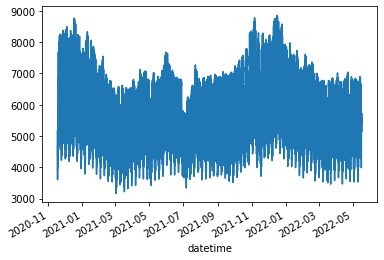

In [ ]:
# Creating a new Series (series2) using the values of the 'load' column of a DataFrame (data) and sets the index of the Series
  # to the values of the 'datetime' column of the DataFrame, converting them to datetime objects using the pd.to_datetime() function:

series2 = pd.Series(data['load'].values, index = pd.to_datetime(data['datetime']))
series2.plot()

# Predict the next value based on the previous 6:

series2_tde = UnivariateTDE(series2.diff(), horizon=1, k=6)
series2_tde.head()

# This line of code is creating a new DataFrame, series2_tde, which contains the time-delayed embeddings of the input univariate
  # time series data, using 6 lags and forecasting 1 step ahead. is calling the UnivariateTDE function with the input series2.diff() which
  # is the first order difference of the series2, an horizon of 1 and a k of 6. The UnivariateTDE function is a time delay embedding
  # technique for univariate time series data.
# By applying the difference method to the series, it is making sure that the series is stationary,
  # making it better for the time series forecasting.

# Separate explanatory variables from the objective variable:

X = series2_tde.drop('t+1', axis=1)
y = series2_tde['t+1']

# This code is splitting the series2_tde DataFrame into two separate objects:
  # X: a DataFrame that contains all columns except for the 't+1' column, which is dropped using the .drop() method and passing 't+1'
    # as the first argument and specifying that the operation should be done on columns (axis=1).
  # y: a Series that contains the values ​​of the 't+1' column of the original DataFrame.

# X and y will be used as input and output in a supervised learning problem respectively. The X dataframe contains all the lagged values
  # ​​and y dataframe contains the next step value for forecasting.

In [ ]:
# TRAINING TEST:

# This code next then, will using the train_test_split function from the scikit-learn library to split the X and y DataFrames into
  # four separate objects:

  # X_train: a DataFrame containing 70% of the rows of the original X DataFrame, that will be used to train the model.
  # X_test: a DataFrame containing 30% of the rows of the original X DataFrame, that will be used to evaluate the model.
  # y_train: a Series containing 70% of the rows of the original y Series, that will be used to train the model.
  # y_test: a Series containing 30% of the rows of the original y Series, that will be used to evaluate the model.

# The train_test_split function uses the test_size parameter (0.3) to determine the proportion of the data that should be allocated
  # to the test set, and the shuffle parameter (False) to determine whether the rows should be shuffled before splitting.

# The following two lines of code are calling the head() method on the resulting X_train and y_train objects, which display the first
  # five rows of the DataFrames/Series.

# This process of splitting the data into training and testing sets is an important step in evaluating the performance of the model,
  # as it allows to evaluate the model on unseen data and get a better idea of how well the model will perform on new data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train.head()
y_train.head()

0    -28.0
1   -177.0
2    -24.0
3    326.0
4    450.0
Name: t+1, dtype: float64

In [ ]:
# At next, we will perform time series cross-validation.

# The TimeSeriesSplit class is a variation of the KFold class that creates splits by preserving the time order of the data.
  # The code first creates an instance of the TimeSeriesSplit class (cv) with n_splits=5, which indicates that the data should be split
  # into 5 folds.

# The code then creates an empty list (cv_err) to store the cross-validation errors.
# The code then uses a for loop to iterate over the splits generated by the TimeSeriesSplit object,
  # where for each split, it extracts the training indices (tr_idx) and test indices (ts_idx) from the X_train and y_train DataFrames.
  # It then uses the indices to extract the corresponding training and validation sets from the X_train and y_train DataFrames and converts
  # them into numpy arrays using the .values ​​attribute.

# It then creates an instance of the Ridge model, which is a linear regression model with L2 regularization, and fits it to the
  # training data using the .fit() method.
  
# It then makes predictions on the validation set using the .predict() method and computes the mean absolute error (MAE) between the
  # predicted values ​​and the true values ​​using the mean_absolute_error() function from scikit-learn library.

# Finally, it appends the computed MAE to the cv_err list and prints the list of errors at the end of the loop.

# The code is performing a cross validation of 5 splits, training the model on each split, making predictions and then computing the
# mean absolute error. These errors are then printed at the end of the loop, giving an idea of ​​how well the model is performing on average.

In [ ]:
# THE PERFORM TIME SERIES CROSS-VALIDATION:

cv = TimeSeriesSplit(n_splits=5)

cv_err = []
for tr_idx, ts_idx in cv.split(X_train, y_train):
    print('Training indices:')
    print(tr_idx[-5:])
    X_tr = X_train.values[tr_idx]
    y_tr = y_train.values[tr_idx]

    X_vl = X_train.values[ts_idx]
    y_vl = y_train.values[ts_idx]

    print('Training the model')
    model = Ridge()

    model.fit(X_tr, y_tr)
    print('Making predictions')
    pred = model.predict(X_vl)

    print('Computing error')
    err = mean_absolute_error(y_vl, pred)
    cv_err.append(err)

    
print(cv_err)

Training indices:
[1521 1522 1523 1524 1525]
Training the model
Making predictions
Computing error
Training indices:
[3047 3048 3049 3050 3051]
Training the model
Making predictions
Computing error
Training indices:
[4573 4574 4575 4576 4577]
Training the model
Making predictions
Computing error
Training indices:
[6099 6100 6101 6102 6103]
Training the model
Making predictions
Computing error
Training indices:
[7625 7626 7627 7628 7629]
Training the model
Making predictions
Computing error
[193.8038781829432, 177.2556403234534, 163.45784476469618, 183.44271803642727, 196.6254559637618]


In [ ]:
# This line below is providing the average error of cross validation, which is an indication of how well the model is
  # performing on average across all the splits. A smaller average error indicates a better model performance. This error
  # metric can be used to compare different models and select the best one.

# Cross estimation validation error:

print(f'Average error is: {np.mean(cv_err)}')

Average error is: 182.91710745425638


In [ ]:
# The error results:
model = Ridge()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
err_test = mean_absolute_error(y_test, pred_test)
print(f'Test error is: {err_test}')

# The code above creates a Ridge regression model, fits it to the training data (X_train and y_train), makes predictions on the test
  # data (X_test) and calculates the mean absolute error (MAE) between the true test labels (y_test) and the predicted test labels
  # (pred_test).

Test error is: 195.08461571155678


In [ ]:
# Model Selection:

model_list = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=10),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
}

In [ ]:
# Underneath, loops through each of the models in the 'model_list' dictionary, and for each one, it performs k-fold cross-validation
  # using the 'cross_val_score' function from scikit-learn library. The 'X_train' and 'y_train' data are passed as the input features
  # and labels to the 'cross_val_score' function. It uses the 'neg_mean_absolute_error' as the scoring metric for the cross-validation.

# Then it is storing the mean absolute error (MAE) from the cross-validation for each model in the 'err_by_method' dictionary,
  # where the key is the name of the method and the value is the mean absolute error.

# Finally it creates a bar plot using the Pandas library to visualize the MAE of each model. The series is created using the
  # 'err_by_method' dictionary and plot method .bar() is used to create the bar plot. 

Running model: Ridge
Running model: Lasso
Running model: RandomForestRegressor
Running model: DecisionTreeRegressor
Running model: KNeighborsRegressor
{'DecisionTreeRegressor': 159.31664482306684,
 'KNeighborsRegressor': 126.36587155963302,
 'Lasso': 182.9179423614517,
 'RandomForestRegressor': 130.0085976408912,
 'Ridge': 182.91710745425638}


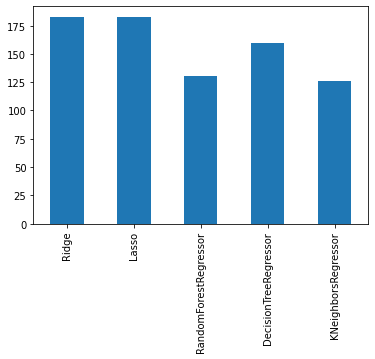

In [ ]:
err_by_method = {}
for method in model_list:
    print(f'Running model: {method}')
    cv_error = cross_val_score(model_list[method],
                               X_train,
                               y_train,
                               cv=cv,
                               scoring='neg_mean_absolute_error')

    err_by_method[method] = -np.mean(cv_error)

pd.Series(err_by_method).plot.bar()

pprint(err_by_method)

In [ ]:
# Parameter Selection:

parameters = {'weights': ['uniform', 'distance'],
              'n_neighbors': [1, 5, 10]}

model = KNeighborsRegressor()
cv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=cv, 
                           refit=True)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

pred_test_best = grid_search.predict(X_test)
err_test = mean_absolute_error(y_test, pred_test_best)

print(f'Test error is: {err_test}')

# The above code is doing hyperparameter tuning for the KNeighborsRegressor model by performing a grid search with cross-validation.
# It is using a TimeSeriesSplit cross-validator with 5 splits and it is setting two parameters for tuning: 'weights' and 'n_neighbors'.
# The 'weights' parameter has two options 'uniform' and 'distance' and 'n_neighbors' has options 1,5,10.

# A GridSearchCV object is created with the estimator (model), parameter grid, cross-validator, and 'refit=True' which will refit the best
  # estimator using the entire dataset after the grid search. The GridSearchCV object is then fitted to the training data (X_train, y_train).
  
# The best estimator is stored in the grid_search.best_estimator_ attribute, and the prediction is made on the test dataset using
  # the grid_search.predict() method. Finally, it calculates the mean absolute error between the true test labels and the predicted test
  # labels.

Test error is: 87.50451303515581
